<a href="https://colab.research.google.com/github/zwjsshi/online_sentiment_analysis/blob/main/online_sentiment_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Online Sentiment Analysis of Soft-drink Brands**


Author: Anqi Chen, Zewen Shi, Vivian Yang, Tong Zhu

# **Section 1: Data Exploration and Visualization**

## 1.1 Explore the Dataset

In [ ]:
# Import the neccesary libraries and set a seed. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import itertools
warnings.filterwarnings("ignore")
%matplotlib inline
from PIL import Image
from google.colab import files
from IPython.display import Image

np.random.seed(22)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
filename = 'softdrink_sentiment.csv'
data = pd.read_csv(filename)

data.head()

,date,prodname,blog,blogcomments,board,facebook,groups,trad,vedio,twitter,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_score,twitter_pos,twitter_neg,twitter_neu,month,year,day
0,20111220.0,7-Up Diet,0.0,0.0,3.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,12.0,2011.0,20.0
1,20111221.0,7-Up Diet,2.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,12.0,2011.0,21.0
2,20111222.0,7-Up Diet,3.0,0.0,4.0,0.0,0.0,0.0,0.0,4.0,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-5.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.0,0.0,1.0,3.0,12.0,2011.0,22.0
3,20111223.0,7-Up Diet,2.0,0.0,5.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,12.0,2011.0,23.0
4,20111224.0,7-Up Diet,9.0,0.0,4.0,0.0,0.0,1.0,0.0,5.0,5.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,12.0,2011.0,24.0


In [ ]:
data.prodname.unique()

array(['7-Up Diet', '7-Up Regular', 'Coke Classic Regular', 'Coke Diet',
       'Coke Zero Diet', 'Diet Rite Pure Zero Diet', 'Dr Pepper Diet',
       'Dr Pepper Regular', 'Fanta Regular',
       'Mountain Dew Code Red Regular', 'Mountain Dew Diet',
       'Mountain Dew Regular', 'Pepsi Diet', 'Pepsi Regular',
       'Sierra Mist Free Diet', 'Sierra Mist Regular', 'Sprite Regular',
       'Sunkist Regular', nan], dtype=object)

In [ ]:
data = data.dropna()

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6426 entries, 0 to 6425
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               6426 non-null   float64
 1   prodname           6426 non-null   object 
 2   blog               6426 non-null   float64
 3   blogcomments       6426 non-null   float64
 4   board              6426 non-null   float64
 5   facebook           6426 non-null   float64
 6   groups             6426 non-null   float64
 7   trad               6426 non-null   float64
 8   vedio              6426 non-null   float64
 9   twitter            6426 non-null   float64
 10  blog_score         6426 non-null   float64
 11  blog_pos           6426 non-null   float64
 12  blog_neg           6426 non-null   float64
 13  blog_neu           6426 non-null   float64
 14  blogcommets_score  6426 non-null   float64
 15  blogcommets_pos    6426 non-null   float64
 16  blogcommets_neg    6426 

In [ ]:
#coke = data[data['prodname'] == "Coke Classic Regular"]
coke = data[data['prodname'].str.contains('Coke')]
coke

,date,prodname,blog,blogcomments,board,facebook,groups,trad,vedio,twitter,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_score,twitter_pos,twitter_neg,twitter_neu,month,year,day
714,20111220.0,Coke Classic Regular,480.0,40.0,768.0,658.0,29.0,1.0,69.0,10563.0,3.98305,53.0,6.0,421.0,1.0,6.0,4.0,30.0,0.517241,64.0,52.0,652.0,2.73723,106.0,31.0,521.0,0.0,1.0,1.0,27.0,0.0,0.0,0.0,1.0,0.00000,2.0,2.0,65.0,0.275657,1244.0,1114.0,8205.0,12.0,2011.0,20.0
715,20111221.0,Coke Classic Regular,530.0,43.0,814.0,773.0,30.0,2.0,58.0,13587.0,3.94118,76.0,9.0,445.0,0.0,4.0,4.0,35.0,0.892857,66.0,46.0,702.0,1.37037,86.0,49.0,638.0,-5.0,0.0,3.0,27.0,0.0,0.0,0.0,2.0,3.33333,5.0,1.0,52.0,0.872549,1797.0,1263.0,10527.0,12.0,2011.0,21.0
716,20111222.0,Coke Classic Regular,472.0,27.0,642.0,560.0,34.0,3.0,50.0,11937.0,4.15254,54.0,5.0,413.0,0.0,3.0,3.0,21.0,0.882353,60.0,42.0,540.0,1.50000,78.0,42.0,440.0,5.0,1.0,0.0,33.0,0.0,0.0,0.0,3.0,3.57143,6.0,1.0,43.0,0.079826,1400.0,1356.0,9181.0,12.0,2011.0,22.0
717,20111223.0,Coke Classic Regular,424.0,25.0,551.0,791.0,29.0,1.0,69.0,12490.0,4.34783,43.0,3.0,378.0,-5.0,0.0,3.0,22.0,0.882353,40.0,28.0,483.0,1.80000,102.0,48.0,641.0,0.0,0.0,0.0,29.0,0.0,0.0,0.0,1.0,1.92308,9.0,4.0,56.0,0.259259,1349.0,1216.0,9925.0,12.0,2011.0,23.0
718,20111224.0,Coke Classic Regular,386.0,21.0,462.0,691.0,15.0,0.0,38.0,12038.0,3.80952,37.0,5.0,344.0,0.0,2.0,2.0,17.0,0.312500,34.0,30.0,398.0,2.60000,95.0,30.0,566.0,0.0,1.0,1.0,13.0,0.0,0.0,0.0,0.0,3.00000,4.0,1.0,33.0,0.630994,1468.0,1139.0,9431.0,12.0,2011.0,24.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1780,20121206.0,Coke Zero Diet,0.0,0.0,110.0,25.0,0.0,3.0,2.0,564.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-2.500000,6.0,18.0,86.0,5.00000,2.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,5.00000,1.0,0.0,1.0,-1.406250,46.0,82.0,436.0,12.0,2012.0,6.0
1781,20121207.0,Coke Zero Diet,0.0,0.0,13.0,12.0,0.0,6.0,0.0,480.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.666670,2.0,1.0,10.0,3.33333,5.0,1.0,6.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,5.0,0.00000,0.0,0.0,0.0,-0.276382,94.0,105.0,281.0,12.0,2012.0,7.0
1782,20121208.0,Coke Zero Diet,0.0,0.0,19.0,28.0,0.0,1.0,3.0,638.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.000000,0.0,3.0,16.0,1.66667,2.0,1.0,25.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,5.00000,2.0,0.0,1.0,-1.818180,56.0,120.0,462.0,12.0,2012.0,8.0
1783,20121209.0,Coke Zero Diet,0.0,0.0,12.0,26.0,0.0,2.0,2.0,634.0,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.000000,0.0,3.0,9.0,5.00000,3.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.00000,0.0,0.0,2.0,-1.855350,50.0,109.0,475.0,12.0,2012.0,9.0


In [ ]:
data.duplicated().sum()

#Droping duplicate entries
data=data.drop_duplicates()

In [ ]:
coke.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1071 entries, 714 to 1784
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               1071 non-null   float64
 1   prodname           1071 non-null   object 
 2   blog               1071 non-null   float64
 3   blogcomments       1071 non-null   float64
 4   board              1071 non-null   float64
 5   facebook           1071 non-null   float64
 6   groups             1071 non-null   float64
 7   trad               1071 non-null   float64
 8   vedio              1071 non-null   float64
 9   twitter            1071 non-null   float64
 10  blog_score         1071 non-null   float64
 11  blog_pos           1071 non-null   float64
 12  blog_neg           1071 non-null   float64
 13  blog_neu           1071 non-null   float64
 14  blogcommets_score  1071 non-null   float64
 15  blogcommets_pos    1071 non-null   float64
 16  blogcommets_neg    107

In [ ]:
coke.describe()

,date,blog,blogcomments,board,facebook,groups,trad,vedio,twitter,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_score,twitter_pos,twitter_neg,twitter_neu,month,year,day
count,1.071000e+03,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000,1071.000000
mean,2.012032e+07,204.949580,12.887955,303.056956,265.173669,11.576097,5.259570,28.130719,7332.373483,2.716339,19.175537,2.332400,183.441643,0.037803,1.140990,1.376284,10.370682,0.789397,24.116713,19.427638,259.512605,2.002514,36.231559,15.637722,213.304388,-0.410127,0.239029,0.445378,10.891690,0.497977,0.535014,0.025210,4.699346,1.660749,4.031746,1.288515,22.810458,-0.151053,847.283847,835.857143,5649.232493,6.375350,2011.966387,15.775910
std,1.726543e+03,239.111872,21.328375,297.078704,431.677618,15.310175,14.934869,40.766393,7948.462165,2.154345,24.615568,3.727852,215.344371,2.679661,2.046586,3.582063,16.867483,1.963686,22.587823,22.706583,254.965887,2.090807,58.838863,34.335854,346.588227,2.218111,0.859694,1.326423,14.356198,1.716459,4.909502,0.173796,13.642881,2.882539,11.622928,2.166406,34.304662,0.948718,1032.191615,979.868705,6205.143027,3.382902,0.180316,8.915817
min,2.011122e+07,0.000000,0.000000,9.000000,4.000000,0.000000,0.000000,0.000000,265.000000,-5.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,8.000000,-5.000000,0.000000,0.000000,3.000000,-5.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,-5.000000,0.000000,0.000000,0.000000,-4.275460,25.000000,23.000000,213.000000,1.000000,2011.000000,1.000000
25%,2.012032e+07,1.000000,1.000000,48.000000,24.000000,0.000000,0.000000,3.000000,577.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,-0.055185,4.000000,3.000000,39.500000,1.000000,3.000000,1.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,-0.667979,67.500000,73.500000,432.500000,3.000000,2012.000000,8.000000
50%,2.012062e+07,78.000000,4.000000,178.000000,41.000000,4.000000,1.000000,8.000000,3573.000000,3.571430,5.000000,1.000000,72.000000,0.000000,0.000000,0.000000,3.000000,0.753425,16.000000,10.000000,151.000000,2.250000,7.000000,3.000000,32.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,1.000000,1.666670,1.000000,0.000000,6.000000,-0.133268,361.000000,431.000000,2695.000000,6.000000,2012.000000,16.000000
75%,2.012091e+07,451.000000,19.000000,572.500000,475.000000,19.000000,4.000000,48.000000,14572.500000,4.536670,43.500000,4.000000,399.500000,0.000000,2.000000,2.000000,15.000000,1.785710,42.000000,32.000000,497.000000,3.247800,64.000000,23.000000,377.500000,0.000000,0.000000,0.000000,18.000000,0.000000,0.000000,0.000000,3.000000,5.000000,5.000000,2.000000,37.500000,0.330398,1549.000000,1518.500000,11383.000000,9.000000,2012.000000,24.000000
max,2.012121e+07,1692.000000,256.000000,1801.000000,5139.000000,87.000000,142.000000,365.000000,54924.000000,5.000000,127.000000,38.000000,1684.000000,5.000000,20.000000,58.000000,200.000000,5.000000,107.000000,251.000000,1443.000000,5.000000,627.000000,680.000000,3859.000000,5.000000,9.000000,20.000000,83.000000,5.000000,106.000000,3.000000,140.000000,5.000000,244.000000,24.000000,347.000000,3.880240,8305.

## 1.2 Explore the External Sources


First, we visualized Coca-Cola closing stock price and social media online platform sentiment movement within the time range from Dec 20, 2011 to Dec 20, 2012 to see whether this external source has a certain impact on the sentiment change. To achieve that, we calculated the average closing stock price for the Coca Coca stock, and the average sentiment score for every social media platform for each month. 

Here, we want to focus on the brand "coke" including coke classic regular, coke diet, and coke zero diet because all the brands in the original dataset are owned by different companies. Given there are 1071 records of coke-related sentiment, we think it should be representative and meaningful to dig deeper and therefore help Coca-Cola have a better idea of their brand's position and develop cost-effective marketing strategies on through different online channels with the help of our predictive model. 



### 1.2.1 Closing Stock Price

In [ ]:
stock_price = files.upload()

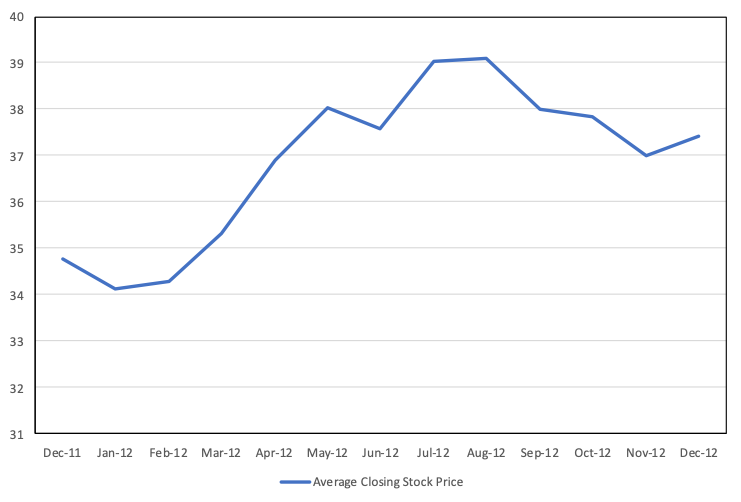

In [ ]:
Image('closing stock price.png',width = 600)

### 1.2.2 Unemployemnt Rate

In [ ]:
unemployment_rate = files.upload()

Saving unemployment rate.jpeg to unemployment rate.jpeg


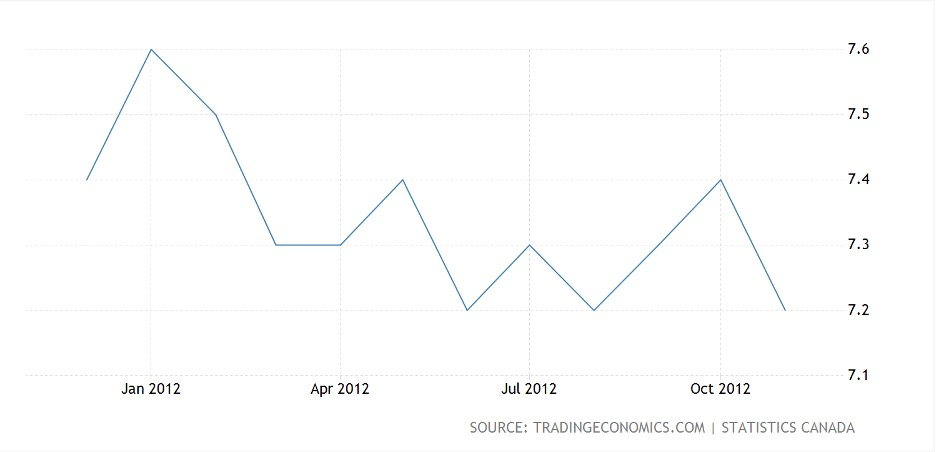

In [ ]:
Image('unemployment rate.jpeg',width = 600)

## 1.3 Visulizations of Online Sentiment Trend

In [ ]:
regular_coke = files.upload()

Saving regular coke.png to regular coke.png


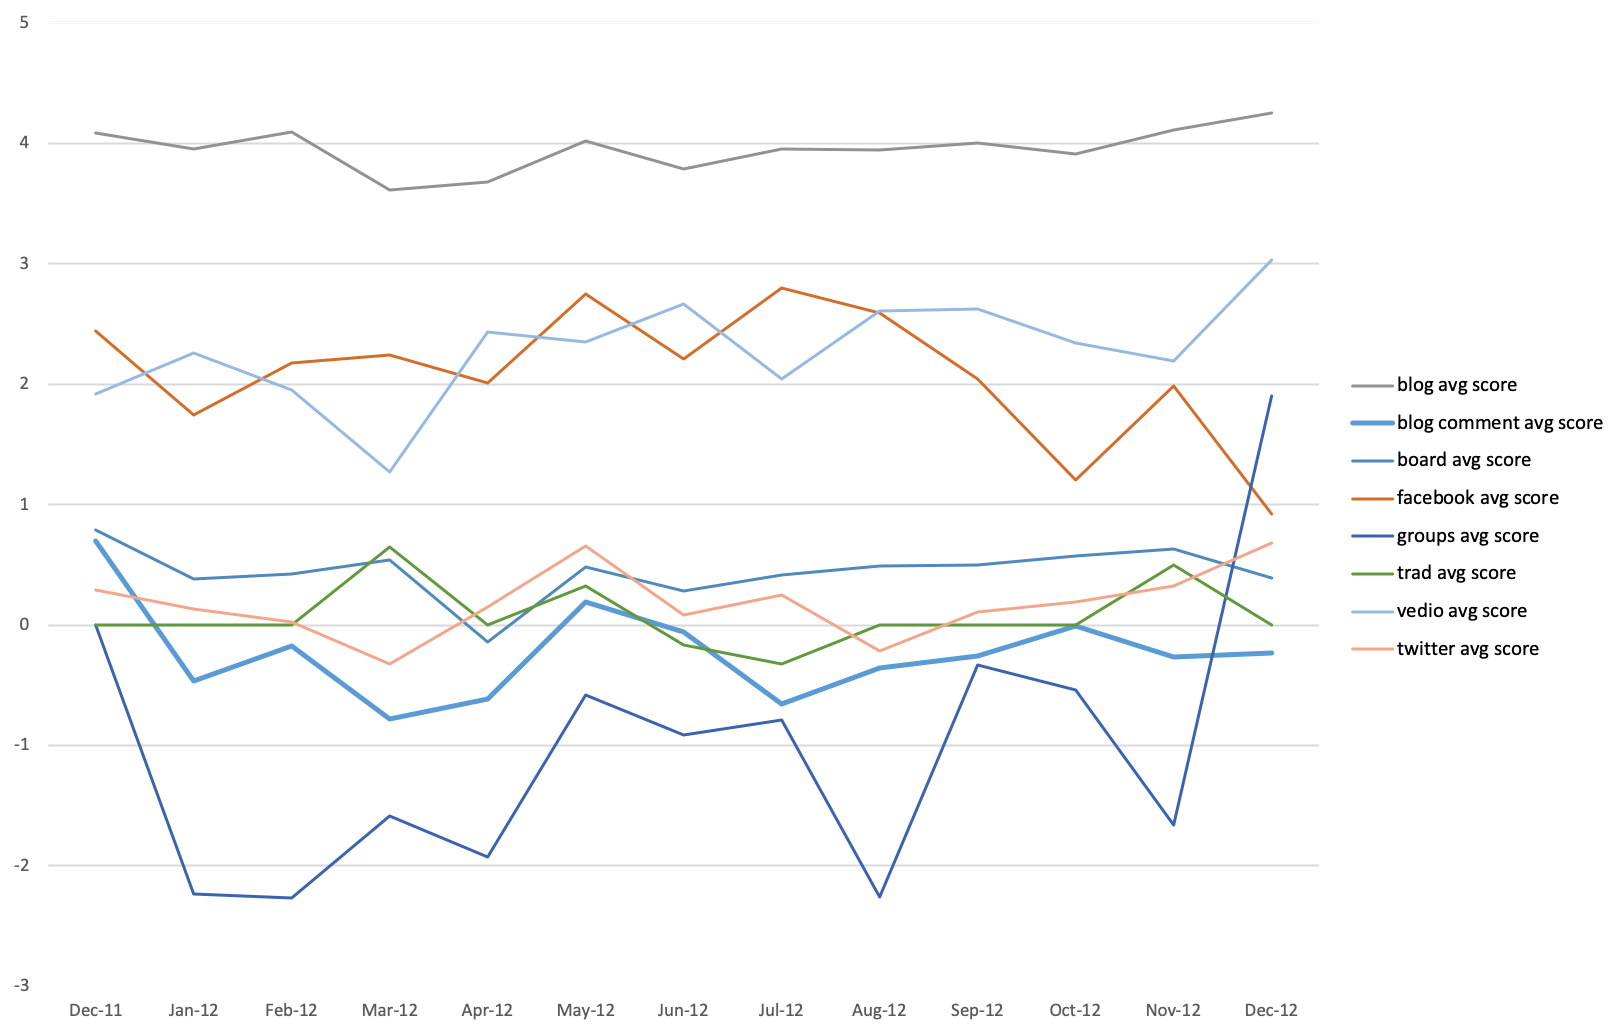

In [ ]:
Image('regular coke.png',width = 600)

In [ ]:
diet_coke = files.upload()

Saving diet coke.png to diet coke.png


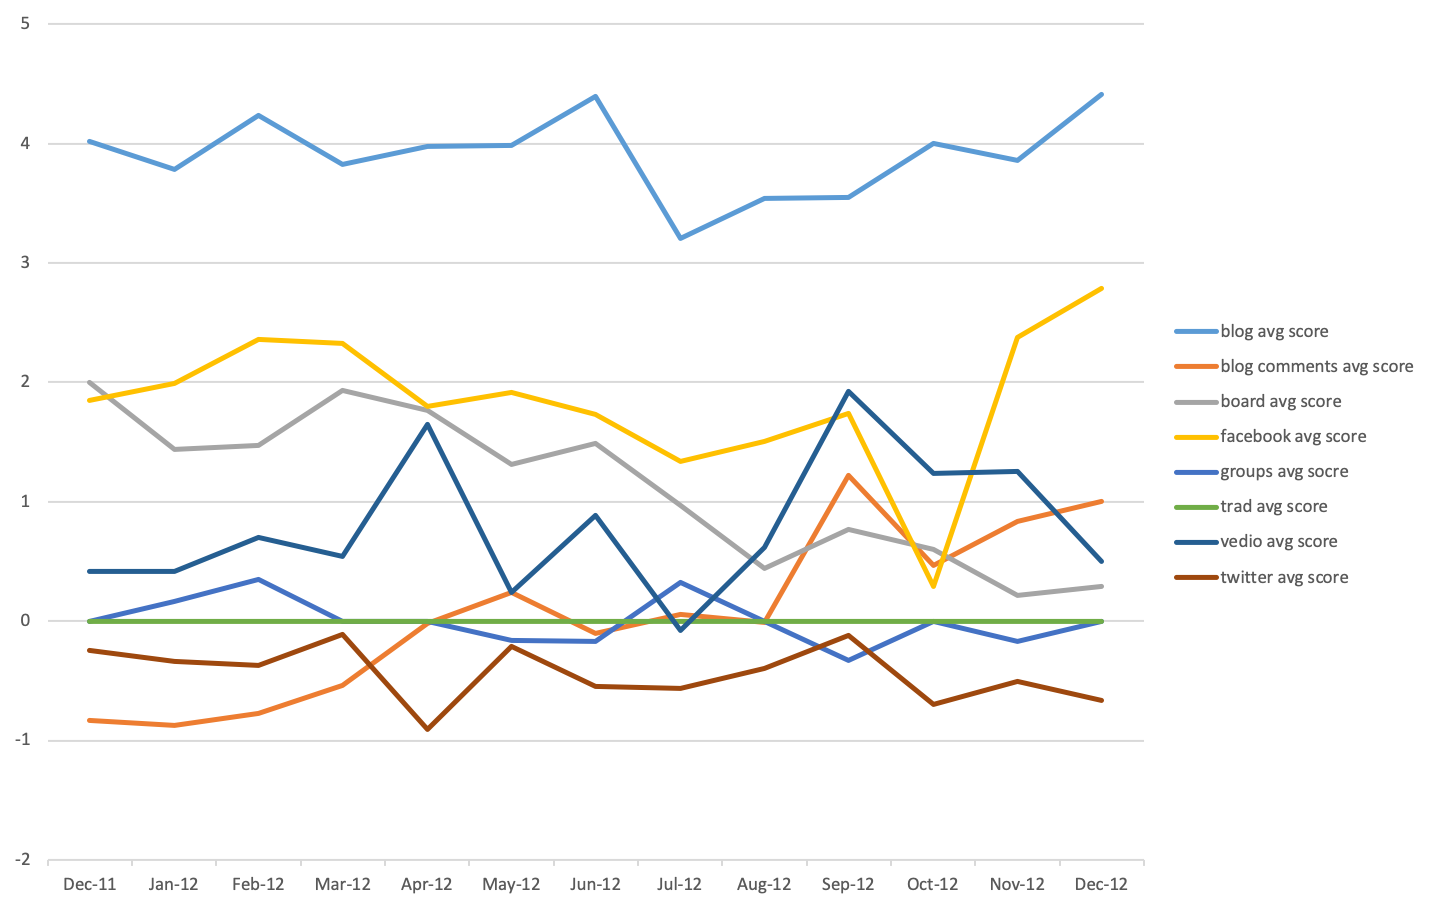

In [ ]:
Image('diet coke.png',width = 600)

From the above time series figures, it seems that for regular coke, twitter average score is the closest trend to stock price movement, while for the diet coke, blog comments average score is the closest trend. 

However, the change of stock closing price and the unemployment rate seem not have much impact on the online sentiment platform overall. Therefore, we will still use the oringinal dataset to build our predictive model. And  we want to mainly focus on twitter.

## 1.4 Visulizations of the Target Variable

(array([-6., -4., -2.,  0.,  2.,  4.,  6.]),
 <a list of 7 Text major ticklabel objects>)

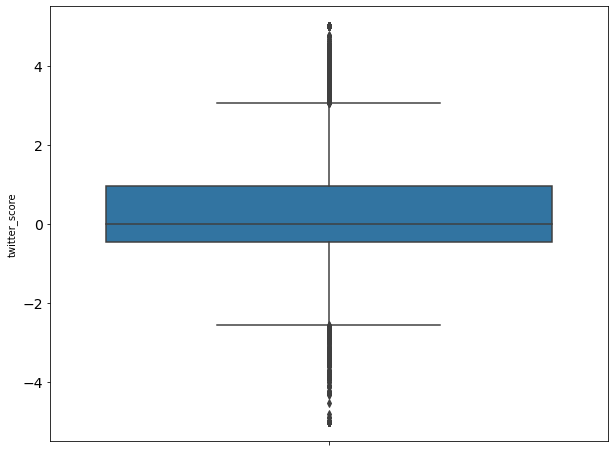

In [ ]:
fig1, ax1 = plt.subplots(figsize=(10,8))
sns.boxplot(data['twitter_score'], orient="v", ax=ax1)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)

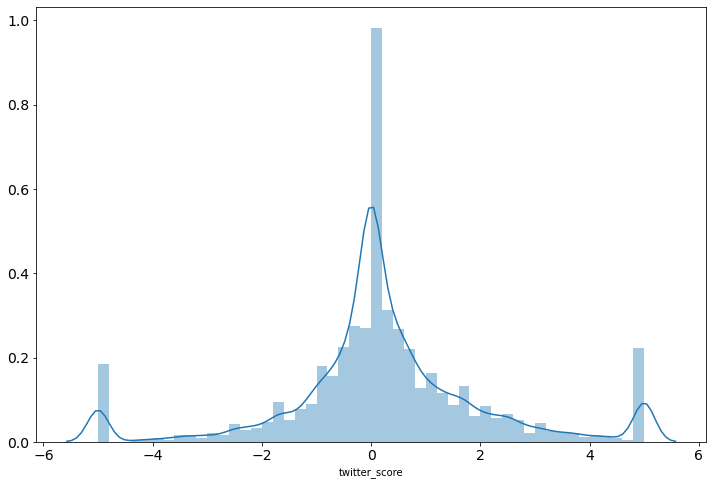

In [ ]:
fig2 , ax2 = plt.subplots(figsize=(12,8))
sns.distplot(data['twitter_score'], ax=ax2)
plt.xticks(fontsize=14)
a=plt.yticks(fontsize=14)

## 1.5 Correlation Matrix

Populating the interactive namespace from numpy and matplotlib


Text(0.5, 1.0, 'CORRELATION BETWEEN VARIABLES')

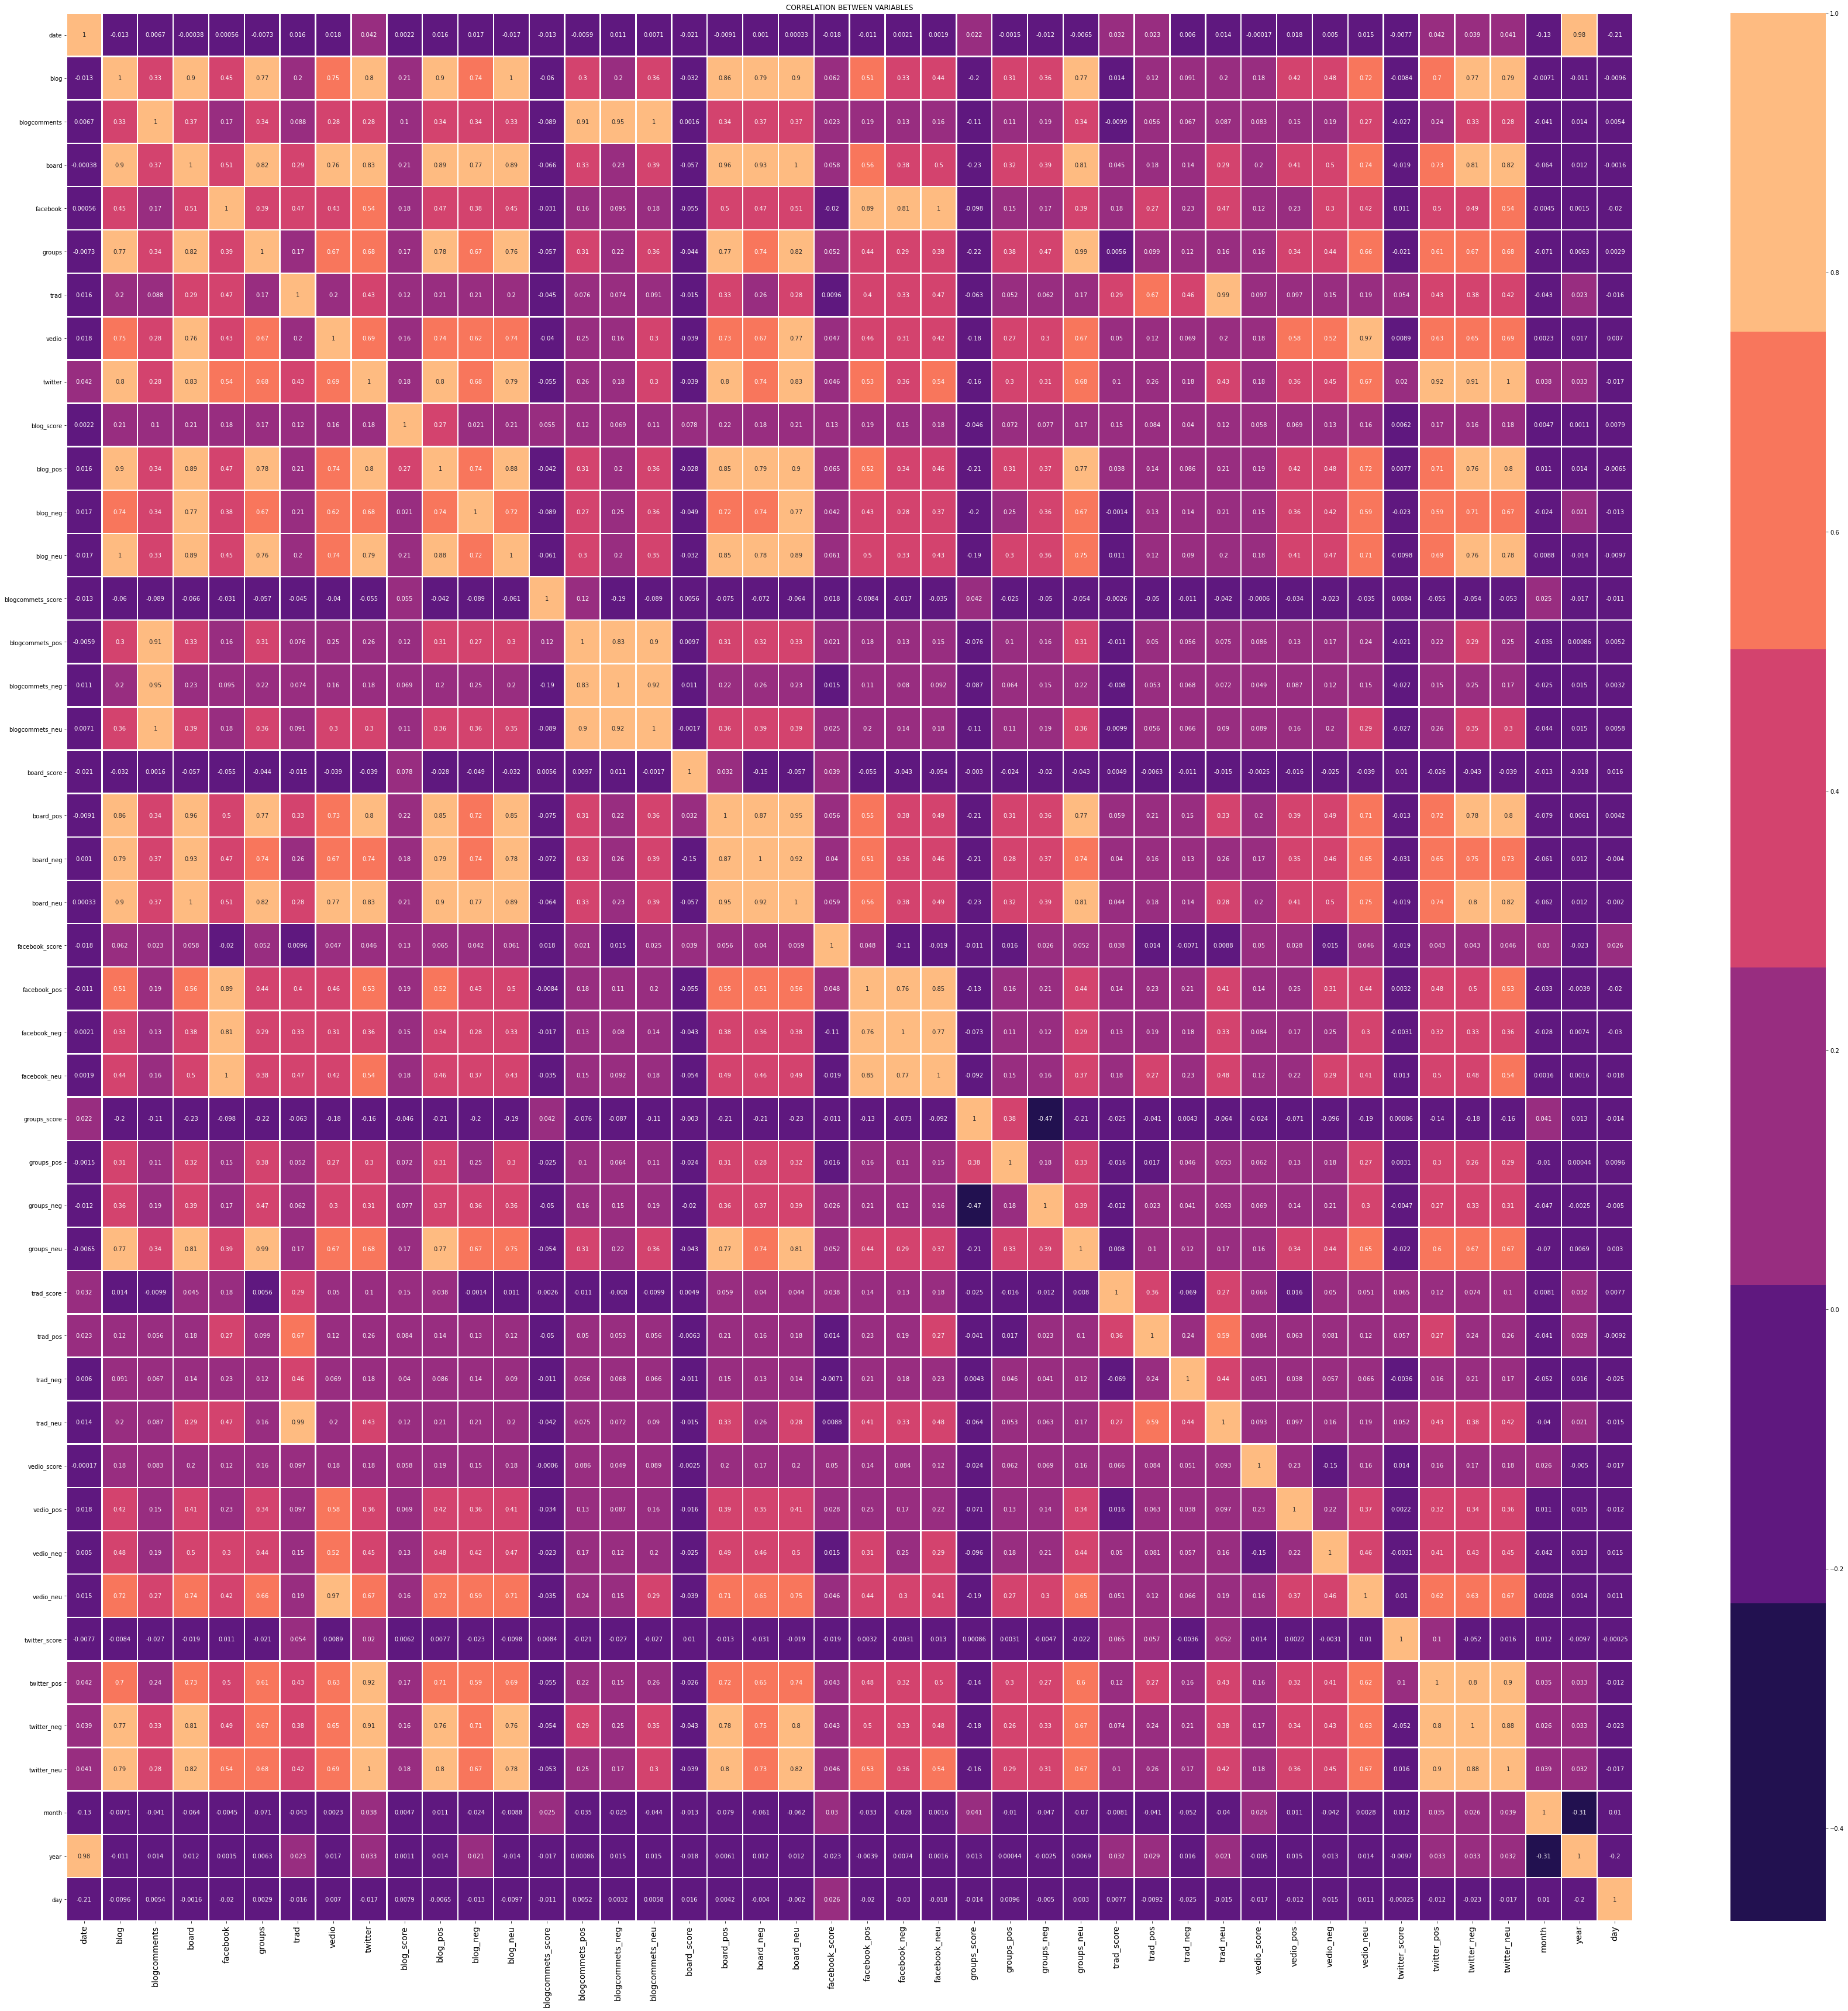

In [ ]:
%pylab inline
pylab.rcParams['figure.figsize'] = (50, 80)
correlation = data.corr()
plt.figure(figsize=(60,60))
plt.xticks(fontsize=14)
sns.heatmap(correlation,annot=True,cmap=sns.color_palette("magma"),linewidth=1.5,edgecolor="k")
plt.title("CORRELATION BETWEEN VARIABLES")

Based on the correlation matrix, we check the colinearity between twitter_score and twitter_pos, twitter_neg and twitter_neu. We found that all absolute corr score is lower than 0.05, which implies that there are no colinearity. So we could include them in our model as predictors.





# **Section 2: Predictive Model Building**

##Our objective

Goal:
1) to help soft drink companies better leverage the social media platform and increase the ROI on the advertisement;
2) to identify the seasonal pattern and optimize the supply chain, distribution channel, and retail store layout;
3) to understand brands' competitors and market position.

Our model would like to uncover the following relationships:
1) how other social media platforms sentiment score affect twitter score;
2)how brands related to each other;
3)the potential seasonal impact on twitter score.

To achieve that, we use twitter score as the target variables, develop a predictive model based on a set of predictors selected and choose the optimal model with the lowest MSE. 

## 2.1 Data Cleaning

In [ ]:
# remove unrelated columns
# these columns are the sum of pos, neg, and nue; we can also see from the correlation matrix; therefore to avoid collinearity
# we also remove date and day because we are going to use month and year as features; therefore to avoid collinearity
sentiment_copy = data.drop(['date','blog','blogcomments','board','facebook','groups','trad','vedio','twitter','day'], axis=1)
sentiment_copy = sentiment_copy.dropna(axis=0, how='all')
sentiment_copy

,prodname,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_score,twitter_pos,twitter_neg,twitter_neu,month,year
0,7-Up Diet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,12.0,2011.0
1,7-Up Diet,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,3.0,12.0,2011.0
2,7-Up Diet,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-5.00000,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.000000,0.0,1.0,3.0,12.0,2011.0
3,7-Up Diet,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,12.0,2011.0
4,7-Up Diet,5.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,12.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,Sunkist Regular,5.0,1.0,0.0,28.0,-5.0,0.0,1.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.842110,13.0,6.0,57.0,12.0,2012.0
6422,Sunkist Regular,5.0,3.0,0.0,27.0,0.0,0.0,0.0,0.0,5.00000,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,0.0,0.0,3.0,1.111110,11.0,7.0,57.0,12.0,2012.0
6423,Sunkist Regular,5.0,2.0,0.0,39.0,-5.0,0.0,1.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.923080,9.0,4.0,62.0,12.0,2012.0
6424,Sunkist Regular,5.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384615,7.0,6.0,42.0,12.0,2012.0


In [ ]:
# change month and year to str
type(sentiment_copy['month'][0]) #float
type(sentiment_copy['month'][0]) #float

sentiment_copy['month'] = sentiment_copy['month'].astype(str)
sentiment_copy['year'] = sentiment_copy['year'].astype(str)
sentiment_copy

,prodname,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_score,twitter_pos,twitter_neg,twitter_neu,month,year
0,7-Up Diet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,12.0,2011.0
1,7-Up Diet,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,3.0,12.0,2011.0
2,7-Up Diet,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-5.00000,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.000000,0.0,1.0,3.0,12.0,2011.0
3,7-Up Diet,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,12.0,2011.0
4,7-Up Diet,5.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,12.0,2011.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,Sunkist Regular,5.0,1.0,0.0,28.0,-5.0,0.0,1.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.842110,13.0,6.0,57.0,12.0,2012.0
6422,Sunkist Regular,5.0,3.0,0.0,27.0,0.0,0.0,0.0,0.0,5.00000,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,0.0,0.0,3.0,1.111110,11.0,7.0,57.0,12.0,2012.0
6423,Sunkist Regular,5.0,2.0,0.0,39.0,-5.0,0.0,1.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.923080,9.0,4.0,62.0,12.0,2012.0
6424,Sunkist Regular,5.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384615,7.0,6.0,42.0,12.0,2012.0


In [ ]:
# check how many rows now
print('sentiment has rows: ' + str(len(data)))
print('after removing rows contains all null values, it has rows: ' + str(len(sentiment_copy)))

# check types
print(type(sentiment_copy['month'][0]))
print(type(sentiment_copy['month'][0]))

sentiment has rows: 6426
after removing rows contains all null values, it has rows: 6426
<class 'str'>
<class 'str'>


In [ ]:
# add a new columns named company 
# products which come from one mother company will label as the same company  
# the reason why we do this is because we want to diversify the features before we do the feature selection; so that we will have many chances to explore which features are important to the model
com_lst = ['7-Up','Coke','Dr Pepper','Fanta','Mountain Dew','Pepsi','Sierra Mist','Sprite','Sunkist','Diet Rite']
import numpy as np
sentiment_copy['company'] = str(np.nan)
for comp in com_lst:
  for i in range(len(sentiment_copy)):
    if (comp in sentiment_copy.loc[i, 'prodname']) is True:
      sentiment_copy.at[i, 'company'] = comp
sentiment_copy['company'].head(5)

0    7-Up
1    7-Up
2    7-Up
3    7-Up
4    7-Up
Name: company, dtype: object

In [ ]:
# add a new column named prodtype
type_lst = ['Diet','Regular','Other']
sentiment_copy['prodtype'] = str(np.nan)
for typ in type_lst:
  for j in range(len(sentiment_copy)):
    if (typ in sentiment_copy.loc[j, 'prodname']) is True:
      sentiment_copy.at[j, 'prodtype'] = typ
sentiment_copy['prodtype'].head(5)

0    Diet
1    Diet
2    Diet
3    Diet
4    Diet
Name: prodtype, dtype: object

In [ ]:
# dummify categorical variables 
sentiment_copy_dummy = pd.get_dummies(sentiment_copy, columns=['prodname','prodtype','company','month','year'])
sentiment_copy_dummy

,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_score,twitter_pos,twitter_neg,twitter_neu,prodname_7-Up Diet,prodname_7-Up Regular,prodname_Coke Classic Regular,prodname_Coke Diet,prodname_Coke Zero Diet,prodname_Diet Rite Pure Zero Diet,prodname_Dr Pepper Diet,prodname_Dr Pepper Regular,prodname_Fanta Regular,prodname_Mountain Dew Code Red Regular,prodname_Mountain Dew Diet,prodname_Mountain Dew Regular,prodname_Pepsi Diet,prodname_Pepsi Regular,prodname_Sierra Mist Free Diet,prodname_Sierra Mist Regular,prodname_Sprite Regular,prodname_Sunkist Regular,prodtype_Diet,prodtype_Regular,company_7-Up,company_Coke,company_Diet Rite,company_Dr Pepper,company_Fanta,company_Mountain Dew,company_Pepsi,company_Sierra Mist,company_Sprite,company_Sunkist,month_1.0,month_10.0,month_11.0,month_12.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,year_2011.0,year_2012.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-5.00000,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-5.000000,0.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
3,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,5.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
4,5.0,2.0,0.0,7.0,0.0,0.0,0.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6421,5.0,1.0,0.0,28.0,-5.0,0.0,1.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,1.0,1.842110,13.0,6.0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6422,5.0,3.0,0.0,27.0,0.0,0.0,0.0,0.0,5.00000,2.0,0.0,13.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5.0,1.0,0.0,5.0,0.0,0.0,0.0,3.0,1.111110,11.0,7.0,57.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6423,5.0,2.0,0.0,39.0,-5.0,0.0,1.0,0.0,5.00000,1.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.923080,9.0,4.0,62.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1
6424,5.0,4.0,0.0,16.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,4.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.384615,7.0,6.0,42.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## **2.2 Feature Selection**
Before building models, it is important to select out predictors from all of the 75 predictors. Random Forest Feature Selector and LASSO are applied in selecting features.


In [ ]:
# Rearrange the dataset for processing convenience 
target=sentiment_copy_dummy['twitter_score']
sentiment_copy_dummy=sentiment_copy_dummy.drop('twitter_score',axis=1)
sentiment_copy_dummy.insert(0,'twitter_score',target)

In [ ]:
# Preview the rearranged dataset to see whether the target variable is successuflly inserted to the first column
sentiment_copy_dummy.head(3)

,twitter_score,blog_score,blog_pos,blog_neg,blog_neu,blogcommets_score,blogcommets_pos,blogcommets_neg,blogcommets_neu,board_score,board_pos,board_neg,board_neu,facebook_score,facebook_pos,facebook_neg,facebook_neu,groups_score,groups_pos,groups_neg,groups_neu,trad_score,trad_pos,trad_neg,trad_neu,vedio_score,vedio_pos,vedio_neg,vedio_neu,twitter_pos,twitter_neg,twitter_neu,prodname_7-Up Diet,prodname_7-Up Regular,prodname_Coke Classic Regular,prodname_Coke Diet,prodname_Coke Zero Diet,prodname_Diet Rite Pure Zero Diet,prodname_Dr Pepper Diet,prodname_Dr Pepper Regular,prodname_Fanta Regular,prodname_Mountain Dew Code Red Regular,prodname_Mountain Dew Diet,prodname_Mountain Dew Regular,prodname_Pepsi Diet,prodname_Pepsi Regular,prodname_Sierra Mist Free Diet,prodname_Sierra Mist Regular,prodname_Sprite Regular,prodname_Sunkist Regular,prodtype_Diet,prodtype_Regular,company_7-Up,company_Coke,company_Diet Rite,company_Dr Pepper,company_Fanta,company_Mountain Dew,company_Pepsi,company_Sierra Mist,company_Sprite,company_Sunkist,month_1.0,month_10.0,month_11.0,month_12.0,month_2.0,month_3.0,month_4.0,month_5.0,month_6.0,month_7.0,month_8.0,month_9.0,year_2011.0,year_2012.0
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
1,0.0,5.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0
2,-5.0,5.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,-5.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,3.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0


In [ ]:
# Separate predictors and target variable 
X=sentiment_copy_dummy.iloc[:,1:]
y=sentiment_copy_dummy['twitter_score']

In [ ]:
# Standardize the predictors 
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_std=scaler.fit_transform(X)

### 2.2.1 Random Forest Feature Selector

In [ ]:
from sklearn.ensemble import RandomForestClassifier

randomforest=RandomForestClassifier(random_state=10)

model_rf=randomforest.fit(X,y.astype('int'))

from sklearn.feature_selection import SelectFromModel

sfm=SelectFromModel(model_rf,threshold=0.05)
sfm.fit(X,y.astype('int'))
for feature_list_index in sfm.get_support(indices=True):
    print(X.columns[feature_list_index])

rf_results=pd.DataFrame(list(zip(X.columns,model_rf.feature_importances_)), 
                            columns = ['predictor','Gini coefficient'])
print(rf_results)

twitter_pos
twitter_neg
twitter_neu
            predictor  Gini coefficient
0          blog_score          0.012546
1            blog_pos          0.021605
2            blog_neg          0.005888
3            blog_neu          0.041495
4   blogcommets_score          0.006450
..                ...               ...
70          month_7.0          0.005787
71          month_8.0          0.006137
72          month_9.0          0.005620
73        year_2011.0          0.002146
74        year_2012.0          0.001705

[75 rows x 2 columns]


In [ ]:
# Print out the predictors select by Random Forest Feature Selector

predictors_rf=list(rf_results[rf_results['Gini coefficient']>0.01]['predictor'])
print(predictors_rf)

['blog_score', 'blog_pos', 'blog_neu', 'blogcommets_neu', 'board_score', 'board_pos', 'board_neg', 'board_neu', 'facebook_score', 'facebook_pos', 'facebook_neg', 'facebook_neu', 'groups_neu', 'trad_pos', 'trad_neu', 'vedio_neu', 'twitter_pos', 'twitter_neg', 'twitter_neu']


Based on the random feature selection, the useful predictors are almost all other platform scores. Seems that the blog users are also associate with twitter users. No wonder that facebook score show in the list. The audience of twitter could also be the users of facebook. When we consider internet marketing strategies, we could consider this as an additional information. 

### 2.2.2 LASSO Feature Selector

In [ ]:
# LASSO Feature Selection
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
X_std = scaler.fit_transform(X)

from sklearn.linear_model import Lasso 
model = Lasso(alpha=0.03,positive=True)
model.fit(X_std,y)

lasso_results=pd.DataFrame(list(zip(X.columns,model.coef_)), columns = ['predictor','coefficient'])
print(lasso_results)

            predictor  coefficient
0          blog_score          0.0
1            blog_pos          0.0
2            blog_neg          0.0
3            blog_neu          0.0
4   blogcommets_score          0.0
..                ...          ...
70          month_7.0          0.0
71          month_8.0          0.0
72          month_9.0          0.0
73        year_2011.0          0.0
74        year_2012.0          0.0

[75 rows x 2 columns]


In [ ]:
# Print out the predictors selected by LASSO
predictors_lasso=list(lasso_results[lasso_results['coefficient']>0]['predictor'])
print(predictors_lasso)

['trad_score', 'twitter_pos', 'prodname_Diet Rite Pure Zero Diet', 'prodname_Dr Pepper Regular', 'prodname_Fanta Regular', 'prodname_Mountain Dew Code Red Regular', 'prodname_Mountain Dew Diet', 'prodname_Pepsi Regular', 'prodname_Sierra Mist Free Diet', 'prodname_Sprite Regular', 'prodname_Sunkist Regular', 'company_Diet Rite', 'company_Dr Pepper', 'company_Fanta', 'company_Mountain Dew', 'company_Sprite', 'company_Sunkist', 'month_12.0', 'month_4.0']


Random Forest Feature Selectors and LASSO provide very different results in the features. Random Forest Feature Selectors filter out features that are mainly number of positive/negative/neutral social network posts. However, predictors selected by LASSO (those with coefficient bigger than 0) considers put more significance on the product itself together with months of the posts released. 
Since results of LASSO provides a more diversified portfolio of the predictors and benefit internet marketing analysis, we choose the predictors selected by LASSO instead of Random Forest Feature Selector. 

Based on the Lasso feature selection, the result is significant different from RF selection method. There is only one important other platform, which is Trad_score, traditional news media. Which implies that the sentiment reviews from traditional new media are more correlated with the feedback mode in twitter. When a company consider post a new marketing campaign on twitter, we suggest them first collect the data from new media to get better understanding of the industry. 

## **2.3 Modeling**
In this section, multiple models are built to predict the twitter score based on the predictors filtered out in 2.2. And mean squared error (MSE) is calculated for each model. By comparing MSE of each model, we are going to select the one with the smallest MSE. The MSE is printed out at the end of each model section.

In [ ]:
# Choose the features filtered by LASSO 
X1=sentiment_copy_dummy.loc[:,predictors_lasso]

# Standardize the predictors 
X1_std=scaler.fit_transform(X1)

In [ ]:
# Split the data into train and test
from sklearn.model_selection import train_test_split

X1_train,X1_test,y_train,y_test=train_test_split(X1_std,y,test_size=0.3,random_state=5)

### 2.3.1 Linear Regression Model

In [ ]:
# Linear Regression Model 
from sklearn.linear_model import LinearRegression 

lm = LinearRegression()
sim1 = lm.fit(X1_train,y_train)

y_test_pred1 = lm.predict(X1_test)

from sklearn.metrics import mean_squared_error
mse1 = mean_squared_error(y_test,y_test_pred1)
print(mse1)


3.1912122563820677


### 2.3.2 K-Nearest Neighbor

In [ ]:
## K-NN

from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)
sim2 = knn.fit(X1_train,y_train)

y_test_pred2 = knn.predict(X1_test)

mse2 = mean_squared_error(y_test,y_test_pred2)
print(mse2)


2.6390747454226116


### 2.3.3 Decision Tree

In [ ]:
## Decision Tree

from sklearn.tree import DecisionTreeRegressor 

dtree = DecisionTreeRegressor(max_depth=5)
sim3 = dtree.fit(X1_train,y_train)

y_test_pred3 = dtree.predict(X1_test)
mse3 = mean_squared_error(y_test,y_test_pred3)
print(mse3)

2.5212124296338336


In [ ]:
# Test on the optimal "max_depth" decision tree is supposed to choose
test01 = 0
optimal_mse01 = 10

for g in range (2,21):
    dtree01 = DecisionTreeRegressor(max_depth=g)
    dior01 = dtree01.fit(X1_train,y_train)
    y_test_pred_dior01 = dtree01.predict(X1_test)
    mse_dior01 = mean_squared_error(y_test,y_test_pred_dior01)
    if mse_dior01 < optimal_mse01:
        optimal_mse01 = mse_dior01 
        test01 = g 
print(test01,optimal_mse01)

13 2.139949222312193


Therefore, it decision tree is chosen, the max_depth is supposed to be set at 13. 

### 2.3.4 Random Forest

In [ ]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor 

randomforest = RandomForestRegressor(random_state=5,n_estimators=50)
sim4 = randomforest.fit(X1_train,y_train)

y_test_pred4 = randomforest.predict(X1_test)
mse4 = mean_squared_error(y_test,y_test_pred4)
print(mse4)


2.1280084613430352


### 2.3.5 Support Vector Machine

In [ ]:
## Support Vector Machine 

from sklearn.svm import SVR 

svm = SVR(kernel='linear',epsilon=0.1)
sim5 = svm.fit(X1_train,y_train)

y_test_pred5 = svm.predict(X1_test)

mse5 = mean_squared_error(y_test,y_test_pred5)
print(mse5)

3.1677722939503443


### 2.3.6 Artificial Neural Networks

In [ ]:
## ANN 
from sklearn.neural_network import MLPRegressor 

ann = MLPRegressor(hidden_layer_sizes=(20),max_iter=100000)
sim6 = ann.fit(X1_train,y_train)

y_test_pred5 = ann.predict(X1_test)

mse6 = mean_squared_error(y_test,y_test_pred5)
print(mse6)

3.101308334698086


Based on all model performance, we choose Random forest as our final model because it has the lowest Mse(2.12). 

### **2.4 Feature Importance of Random Forest Model**

Up to this point, Random Forest suggests the best result with the leaset mean sqaured errors provided. Therefore, it is chosen as the predictive model for our use case.

In [ ]:
# Get numerical feature importances
importances = list(randomforest.feature_importances_)

# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(predictors_lasso, importances)]

# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances];

Variable: twitter_pos          Importance: 0.54
Variable: prodname_Sierra Mist Free Diet Importance: 0.06
Variable: trad_score           Importance: 0.05
Variable: company_Mountain Dew Importance: 0.05
Variable: prodname_Diet Rite Pure Zero Diet Importance: 0.04
Variable: prodname_Fanta Regular Importance: 0.03
Variable: prodname_Mountain Dew Code Red Regular Importance: 0.03
Variable: prodname_Mountain Dew Diet Importance: 0.03
Variable: company_Diet Rite    Importance: 0.03
Variable: company_Dr Pepper    Importance: 0.03
Variable: company_Fanta        Importance: 0.03
Variable: month_12.0           Importance: 0.02
Variable: month_4.0            Importance: 0.02
Variable: prodname_Sunkist Regular Importance: 0.01
Variable: company_Sunkist      Importance: 0.01
Variable: prodname_Dr Pepper Regular Importance: 0.0
Variable: prodname_Pepsi Regular Importance: 0.0
Variable: prodname_Sprite Regular Importance: 0.0
Variable: company_Sprite       Importance: 0.0


Based on the feature importance, we could easily conclude that the twitter's positive count is the most significant factor in deciding the score of twitter. Then, the traditional news media platform also shares the same users as twitter. 

We could also surprisely found that the products Sierra Mist Free Diet, Diet Rite Pure Zero Diet, Fanta Regular, Mountain Dew Code Red Regular,Mountain Dew Diet,Diet Rite,Dr Pepper are highly related to the twitter score, which could speculate that these products are highly mentioned in Twitter than other brands. If these company are considering marketing campaign, Twitter could be a good choice. 

We also noticed that there is a seasonal effect. The Month December and April seems also important in prediction model. We could try to conclude that during these 2 months, the audience will give more extreme feedback on platform twitter. When company making decision, they should be careful in these 2 months. 

# **Section 3: Marketing Insights and Recommendations**

Some of the marketing insights derived from our model are as follows:

1. The brand can leverage multiple social media channels to increase ROI on the advertisement and understand customers' sentiment timely. For example, certain groups of customers might show strong negative sentiments to certain flavors or prefer the regular version to the diet version. Then, the company might look into this group and investigate further. The company can also do A/B testing and versioning to see whether the flavor actually has such impact. 
2. The brand can consider the seasonal effect to better optimize the distribution channels i.e retail stores, online stores. 
3. The brand can also see how customers' sentiment on competitors and leverage the insights to gain stronger market power.